<a href="https://colab.research.google.com/github/luisfelipe100/PCD/blob/main/PCD_Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D




In [ ]:
from keras.utils import to_categorical

In [ ]:
# to calculate accuracy
from sklearn.metrics import accuracy_score

In [ ]:
import os
from PIL import Image

# Path to the folder containing images
image_folder = "/content"  # Replace with your folder path

# Define classification logic
categories = {"Durazno": 0, "Colmillos": 1, "RolCanela": 2, "Bisquet": 3}

# Initialize arrays for storing image vectors and labels
image_vectors = []
y_labels = []

# Loop through each file in the folder
file_names = os.listdir(image_folder)

for file_name in file_names:
    file_path = os.path.join(image_folder, file_name)

    # Check if the file is an image (optional: filter extensions)
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        # Load the image and process it
        img = Image.open(file_path).convert('L')  # Convert to grayscale
        img = img.resize((160, 117))  # Resize to 117x160
        img_array = np.array(img).flatten()  # Flatten to a 1D vector
        img_array = img_array / 255.0  # Normalize pixel values

        # Append the processed image vector to the list
        image_vectors.append(img_array)

        # Assign a label based on the file name
        label = None
        for keyword, class_label in categories.items():
            if keyword in file_name:
                label = class_label
                break
        if label is not None:
            y_labels.append(label)

# Convert lists to NumPy arrays
X = np.array(image_vectors)
y = np.array(y_labels)

# Optionally convert labels to one-hot encoding
y_one_hot = to_categorical(y, num_classes=len(categories))

# Print shapes for verification
print(f"Shape of X (image vectors): {X.shape}")
print(f"Shape of y (labels): {y.shape}")
print(f"Shape of y_one_hot (one-hot encoded labels): {y_one_hot.shape}")


Shape of X (image vectors): (250, 18720)
Shape of y (labels): (250,)
Shape of y_one_hot (one-hot encoded labels): (250, 4)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.1, random_state=42)

# Print the shapes to confirm the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (225, 18720)
X_test shape: (25, 18720)
y_train shape: (225, 4)
y_test shape: (25, 4)


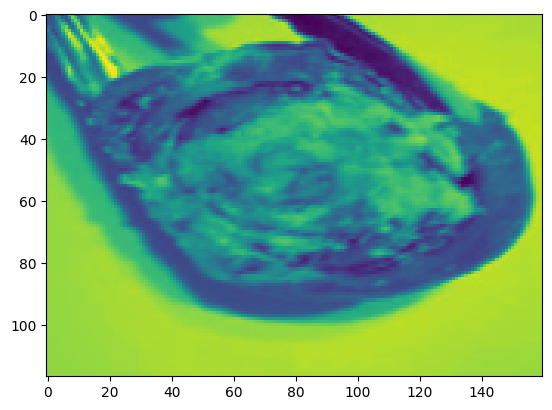

In [ ]:
#See some images of the dataset
plt.imshow(X_train.reshape(X_train.shape[0], 117, 160, 1)[80])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example Keras model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.3031 - loss: 6.8190 - val_accuracy: 0.3200 - val_loss: 3.5821
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.3760 - loss: 2.9685 - val_accuracy: 0.3200 - val_loss: 1.5208
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.3099 - loss: 2.2360 - val_accuracy: 0.4000 - val_loss: 1.5598
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5308 - loss: 1.2109 - val_accuracy: 0.7600 - val_loss: 0.7664
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6862 - loss: 0.8273 - val_accuracy: 0.5600 - val_loss: 0.9327
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5653 - loss: 0.9801 - val_accuracy: 0.5200 - val_loss: 0.9709
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6384 - loss: 0.7502 - val_accuracy: 0.6400 - val_loss: 0.7881
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8399 - loss: 0.5782 - val_accuracy: 0.6400 - val_loss: 0.7569